In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os

In [2]:
STANDARD_DATA_DIRECTORY_STRUCTURE = 'data/Testing/'
STANDARD_RESIZE_VALUE = 200
classifier_classes = {'no_tumor': 0, 'glioma_tumor': 1, 'pituitary_tumor': 1, 'meningioma_tumor': 1}

In [3]:
X = []
Y = []

for cls_class in classifier_classes:
    path = STANDARD_DATA_DIRECTORY_STRUCTURE + cls_class
    for file in os.listdir(path):
        img = cv2.imread(path + '/' + file, 0)
        img = cv2.resize(img, (STANDARD_RESIZE_VALUE, STANDARD_RESIZE_VALUE))
        X.append(img)
        Y.append(classifier_classes[cls_class])

In [4]:
X = np.array(X)
Y = np.array(Y)
X.shape

(394, 200, 200)

In [5]:
# Sklearn accepts only bidiomensional data, so we have to convert it

X_reshape = X.reshape(len(X), -1)
X_reshape.shape

(394, 40000)

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(X_reshape, Y, random_state=10, test_size=.2)

In [7]:
xTrain.shape, xTest.shape

((315, 40000), (79, 40000))

In [8]:
# Scalling data

xTrain = xTrain / 255
xTest = xTest / 255

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
classifier = LogisticRegression(C=0.1)
classifier.fit(xTrain, yTrain)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [11]:
classifier.score(xTest, yTest)

0.8481012658227848

In [12]:
values_classifier = {0: 'No Tumor', 1: 'Is Tumor'}

In [19]:
def test_based_on_images(fileTestingClass, dir_source, size = 9):
    plt.figure(figsize=(12, 8))
    path = os.listdir(dir_source)
    
    subplot_index = 1

    for i in os.listdir(dir_source + fileTestingClass)[:size]:
        plt.subplot(3, 3, subplot_index)

        img = cv2.imread(dir_source + fileTestingClass + i, 0)
        img_resized = cv2.resize(img, (STANDARD_RESIZE_VALUE, STANDARD_RESIZE_VALUE))
        img_resized = img_resized.reshape(1, -1) / 255
        path = classifier.predict(img_resized)
        plt.title(values_classifier[path[0]])
        plt.imshow(img, cmap = 'gray')
        plt.axis('off')
        
        if subplot_index == 9:
            subplot_index = 1
        else:
            subplot_index += 1

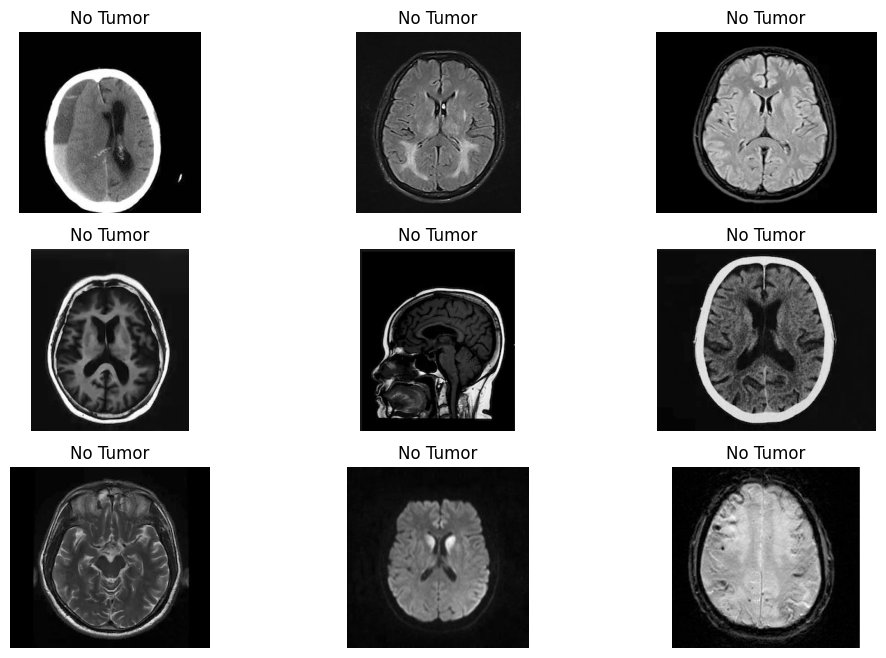

In [20]:
test_based_on_images('no_tumor/', STANDARD_DATA_DIRECTORY_STRUCTURE)

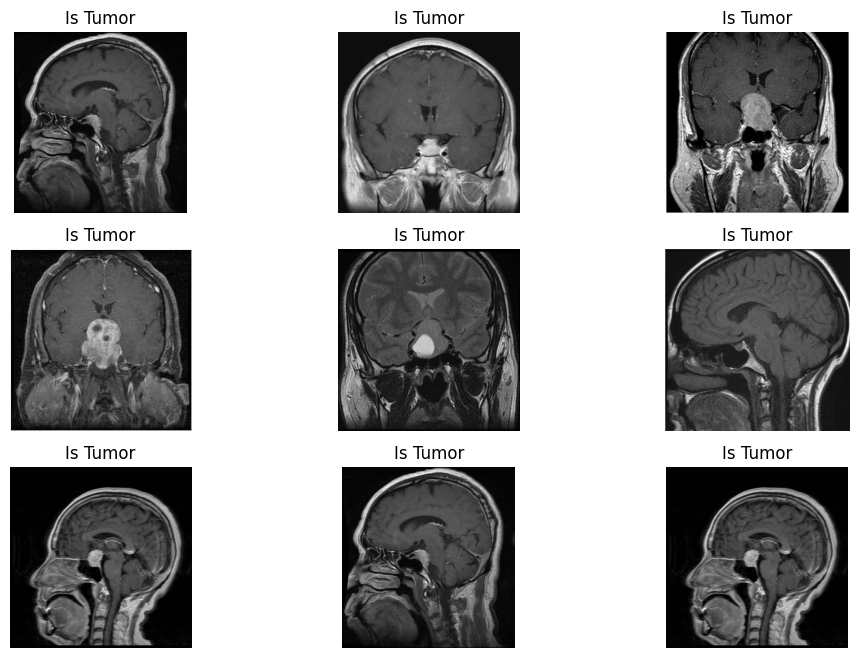

In [21]:
test_based_on_images('pituitary_tumor/', STANDARD_DATA_DIRECTORY_STRUCTURE)

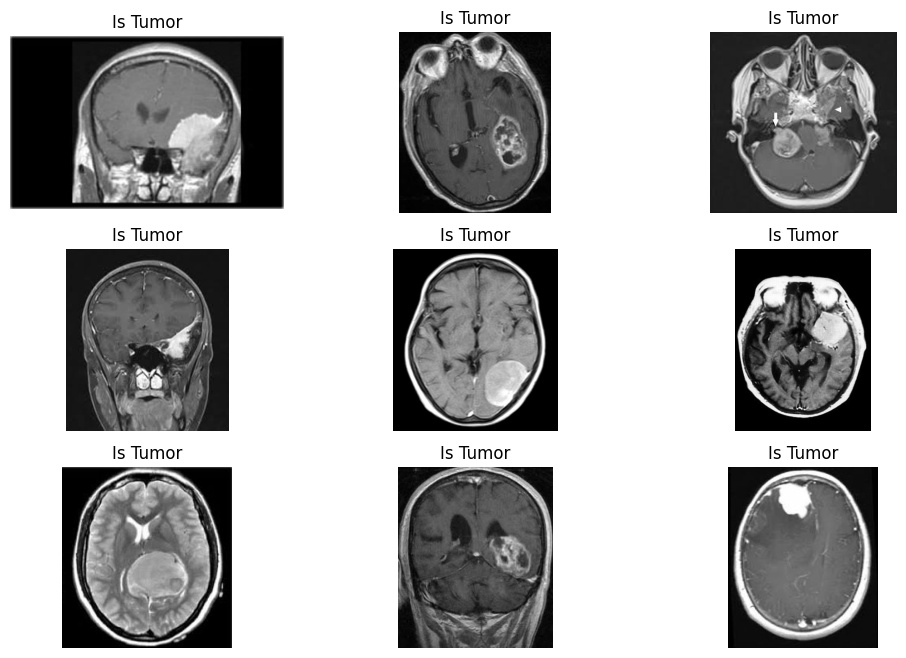

In [23]:
test_based_on_images('meningioma_tumor/', STANDARD_DATA_DIRECTORY_STRUCTURE)

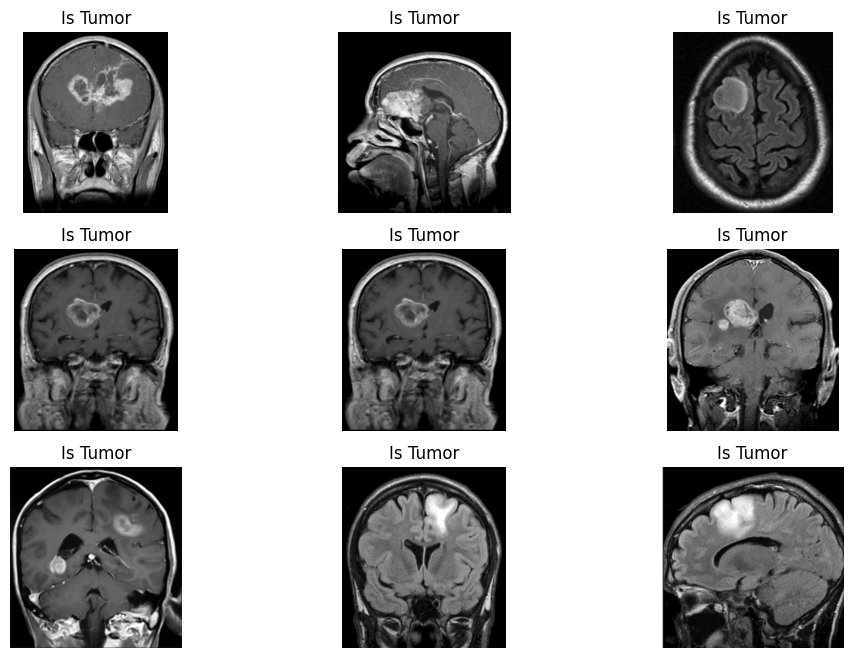

In [24]:
test_based_on_images('glioma_tumor/', STANDARD_DATA_DIRECTORY_STRUCTURE)

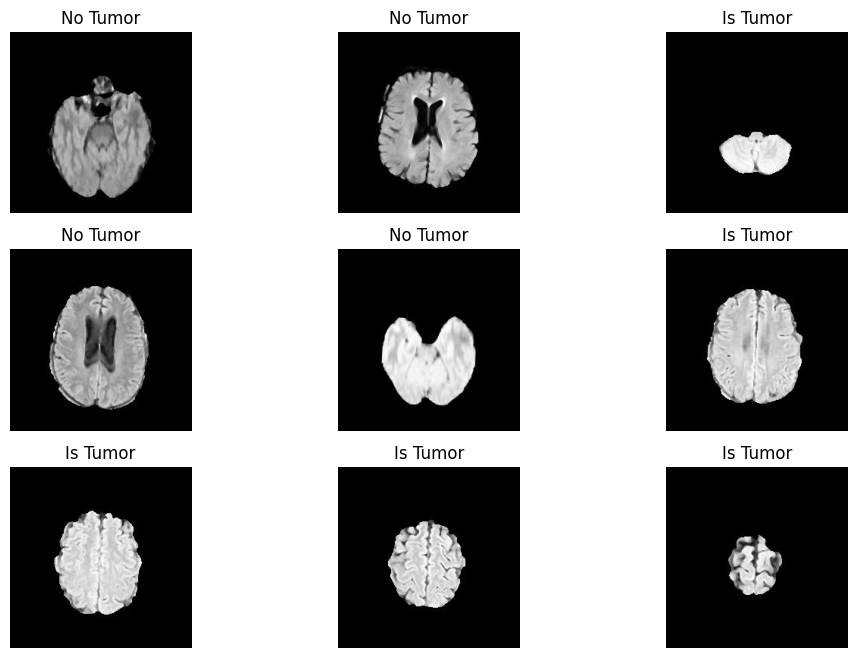

In [26]:
test_based_on_images('brain_tumor/', STANDARD_DATA_DIRECTORY_STRUCTURE, 20)